# Predicting heart disease using machine learning

This notebook looks into using varius Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The Original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach at least 90% accuracy or closer at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [247]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, roc_curve

# Pipeline
from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

## Load Data

In [248]:
df = pd.read_csv("../data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis AKA EDA)

The goal is here to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [249]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [250]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [251]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

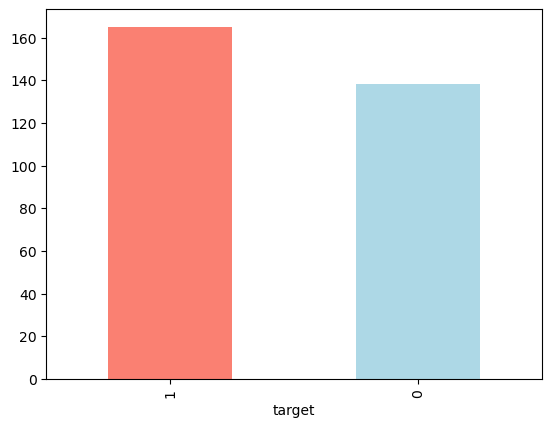

In [252]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [254]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [255]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [256]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [257]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


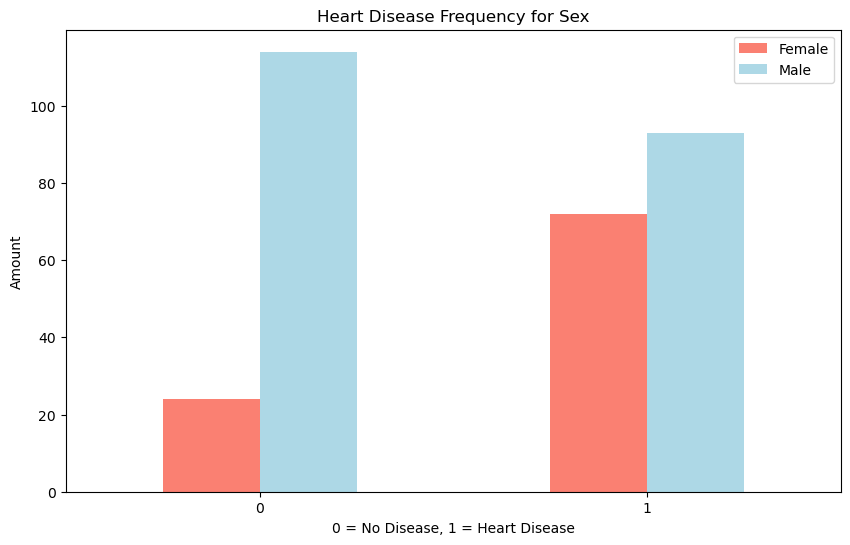

In [258]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [259]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [260]:
df["thalach"].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

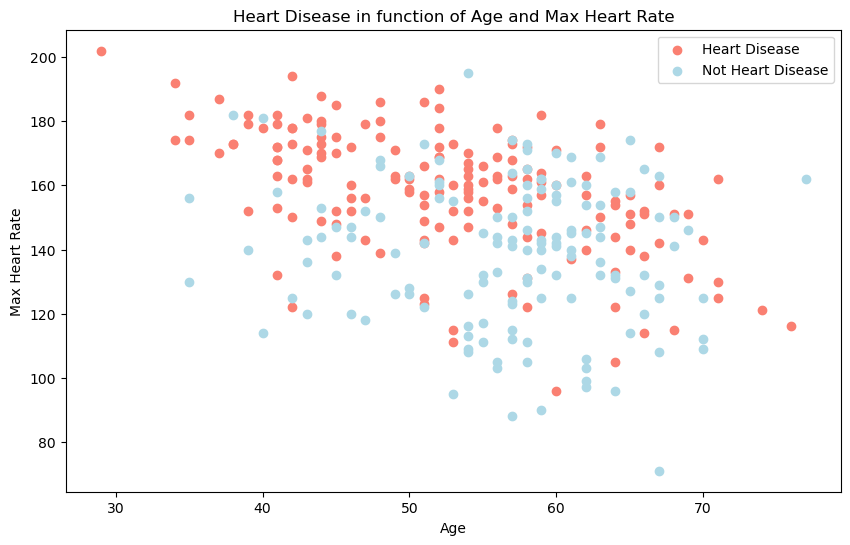

In [261]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "Not Heart Disease"]);

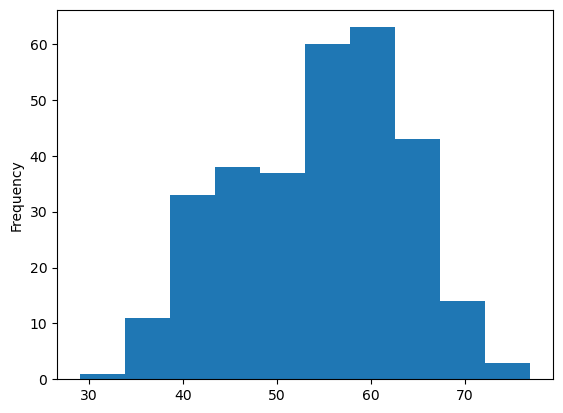

In [262]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [263]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


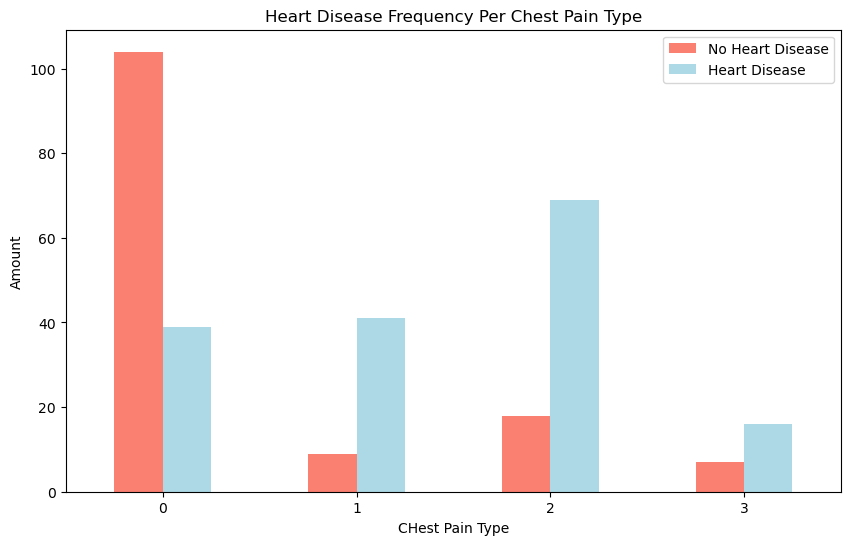

In [264]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("CHest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

In [265]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


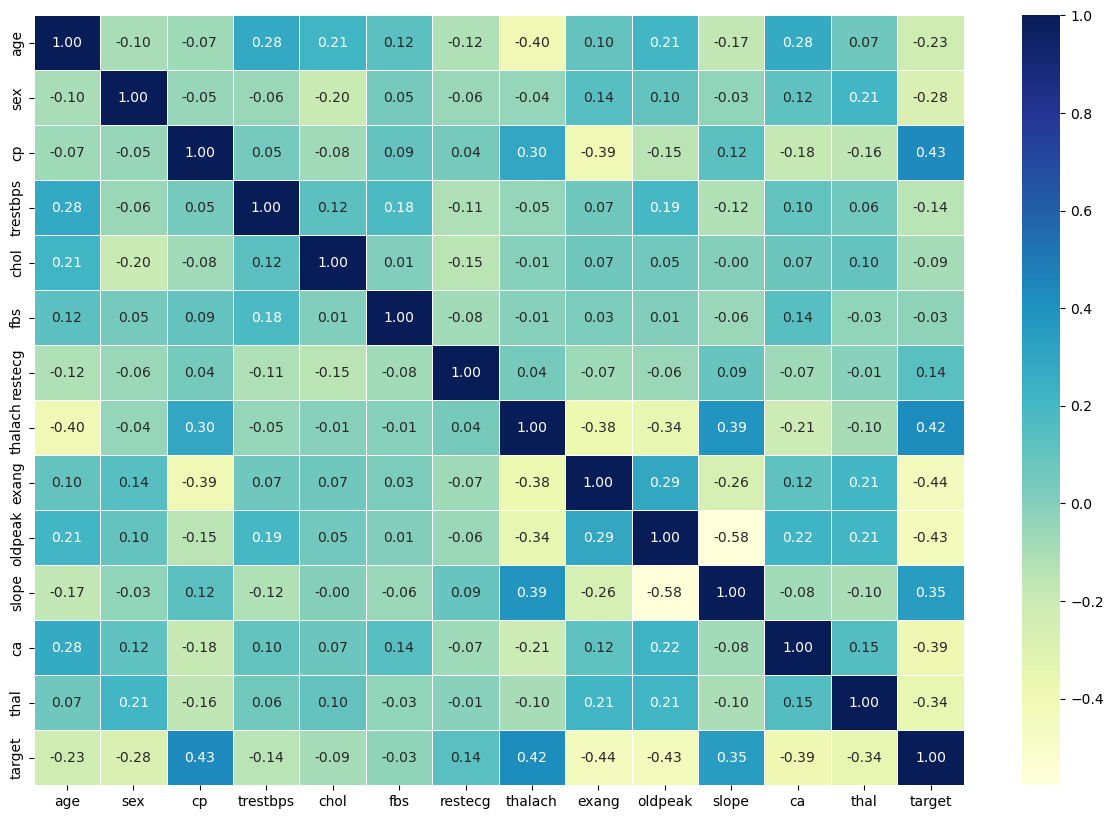

In [266]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling

In [267]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [268]:
# Split data into X & y
X = df.drop("target", axis=1)
y = df["target"]

In [269]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [270]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [271]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [272]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [273]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

---

No we've got our data into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [274]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [275]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [276]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

D:\4. Coding Folder\heart-disease-predictor-app\model\env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison (Baseline results)

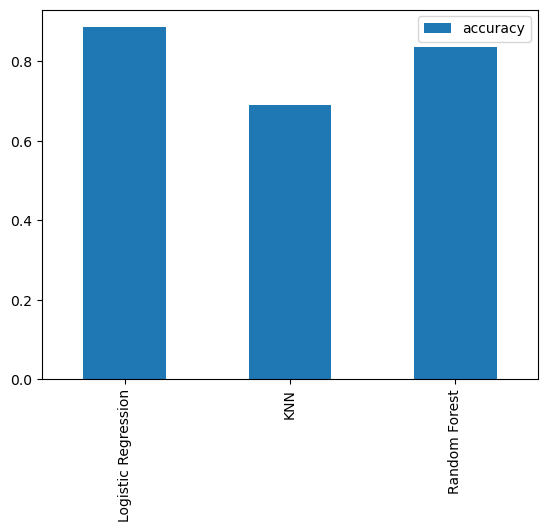

In [277]:
model_compare = pd.DataFrame(model_scores,
                             index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next step off. What should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (By hand)

In [278]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


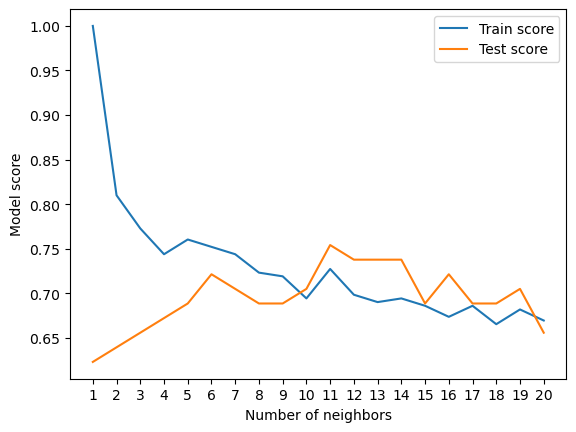

In [279]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* `LogisticRegression()`
* `RandomForestClassifier()`

... using `RandomizedSearchCV()`

In [280]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Now we've got hyperparameter grids setup for each of our models, Let's tune them using `RandomizedSearchCV()`.

In [281]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [282]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [283]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned `LogisticRegression()`, let's do the same for `RandomForestCLassifier()`

In [284]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2)

# Fit random hyperparameter search model for RandomForestCLassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [285]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [286]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with `GridSearchCV()`

since our LogisticRegression model provides best scores so far, we'll try and improve them again using GridSearchCV

In [287]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

In [288]:
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [289]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [290]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [291]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

---
Let's try with feature scaling and one hot encoding with `LogisticRegression()`

In [339]:
# Define categorical and numeric columns
categorical_features = ['cp', 'restecg', 'slope', 'thal', 'ca']
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [340]:
# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)


In [341]:
# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [342]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8852459016393442

In [343]:
np.mean(cross_val_score(pipeline, X, y))

np.float64(0.851256830601093)

In [344]:
# Different hyperparameters for our pipeline with LogisticRegression
log_reg_grid = {
    "classifier__C": np.logspace(-3, 3, 10),
    "classifier__solver": ["liblinear"],
    "classifier__penalty": ["l1", "l2"]
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(
    pipeline,
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

In [345]:
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['cp',
                                                                          'restecg',
                                                                          'slope',
                                                                          'thal',
                                                                          'ca'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             verbose=True)

In [346]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [347]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

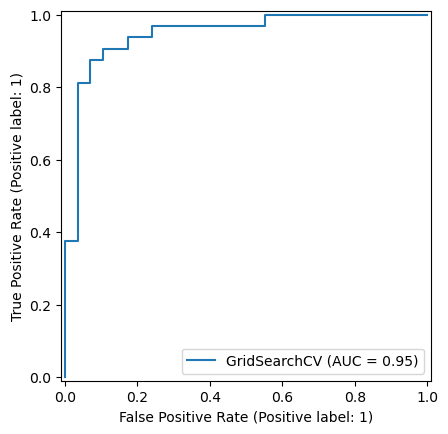

In [348]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [349]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[26  3]
 [ 4 28]]


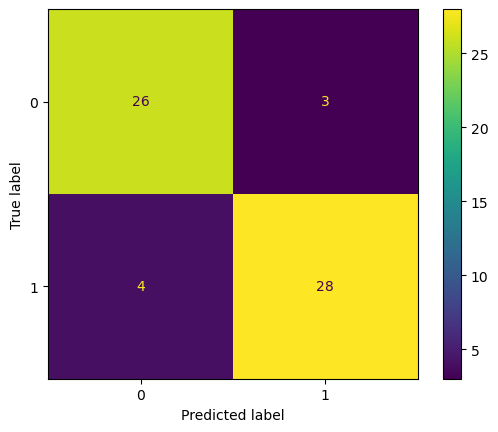

In [350]:
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross validated precision, recall and f1-score.

In [351]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Calculate evalution metrics using cross validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`. 

In [352]:
# Check best hyperparameters
gs_log_reg.best_params_

{'classifier__C': np.float64(0.46415888336127775),
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [353]:
# Create a new classifier and pipeline
clf = LogisticRegression(C=0.46415888336127775,
                         solver="liblinear",
                         penalty='l2')

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", clf)
    ]
)

In [354]:
# Cross-validated accuracy
cv_acc = cross_val_score(model,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.86885246, 0.90163934, 0.83606557, 0.86666667, 0.76666667])

In [355]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [356]:
# Cross-validated precision
cv_precision = cross_val_score(model,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision

array([0.83783784, 0.90909091, 0.87096774, 0.85714286, 0.75675676])

In [357]:
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8463592205527689)

In [358]:
# Cross-validated recall
cv_recall = cross_val_score(model,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall

array([0.93939394, 0.90909091, 0.81818182, 0.90909091, 0.84848485])

In [359]:
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.884848484848485)

In [360]:
# Cross-validated f1-score
cv_f1 = cross_val_score(model,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.88571429, 0.90909091, 0.84375   , 0.88235294, 0.8       ])

In [361]:
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8641816271963331)

In [362]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8852459016393442

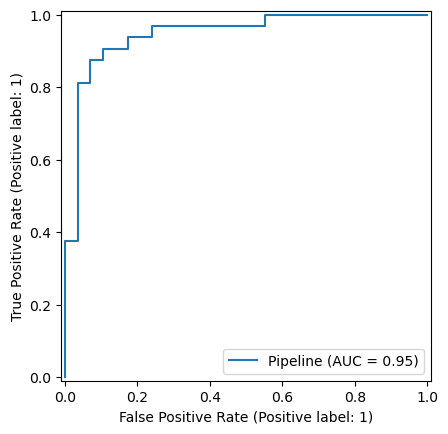

In [363]:
RocCurveDisplay.from_estimator(model,
                               X_test,
                               y_test)

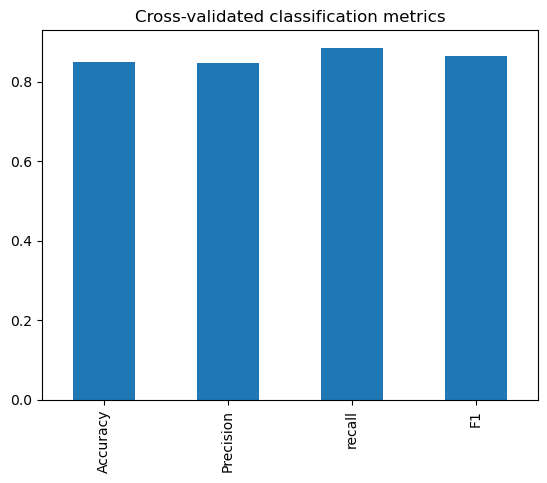

In [364]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(
    {
        "Accuracy": cv_acc,
        "Precision": cv_precision,
        "recall": cv_recall,
        "F1": cv_f1
    },
    index=[0]
)

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

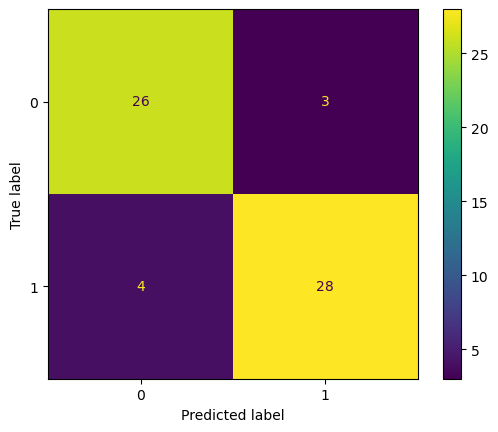

In [365]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

---
Let's also try with `drop='first'` in OneHotEncoding

In [366]:
# Define transformers
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [367]:
clf = LogisticRegression(C=0.46415888336127775,
                         solver="liblinear",
                         penalty='l2')

model_2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_2),
        ('model_2', clf)
    ]
)

In [368]:
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.9016393442622951

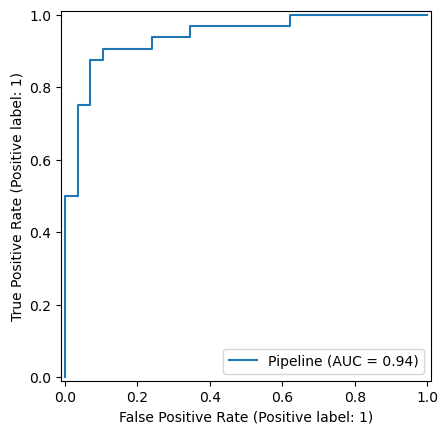

In [369]:
RocCurveDisplay.from_estimator(model_2, X_test, y_test)

In [370]:
# Cross-validated accuracy
cv_acc_2 = cross_val_score(model_2,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc_2

array([0.83606557, 0.90163934, 0.80327869, 0.83333333, 0.8       ])

In [371]:
cv_acc_2 = np.mean(cv_acc_2)
cv_acc_2

np.float64(0.8348633879781422)

In [372]:
# Cross-validated precision
cv_precision_2 = cross_val_score(model_2,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision_2

array([0.82857143, 0.90909091, 0.83870968, 0.82857143, 0.8       ])

In [373]:
cv_precision_2 = np.mean(cv_precision_2)
cv_precision_2

np.float64(0.8409886887306243)

In [374]:
# Cross-validated recall
cv_recall_2 = cross_val_score(model_2,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall_2

array([0.87878788, 0.90909091, 0.78787879, 0.87878788, 0.84848485])

In [375]:
cv_recall_2 = np.mean(cv_recall_2)
cv_recall_2

np.float64(0.8606060606060606)

In [376]:
# Cross-validated f1-score
cv_f1_2 = cross_val_score(model_2,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1_2

array([0.85294118, 0.90909091, 0.8125    , 0.85294118, 0.82352941])

In [377]:
cv_f1_2 = np.mean(cv_f1_2)
cv_f1_2

np.float64(0.8502005347593583)

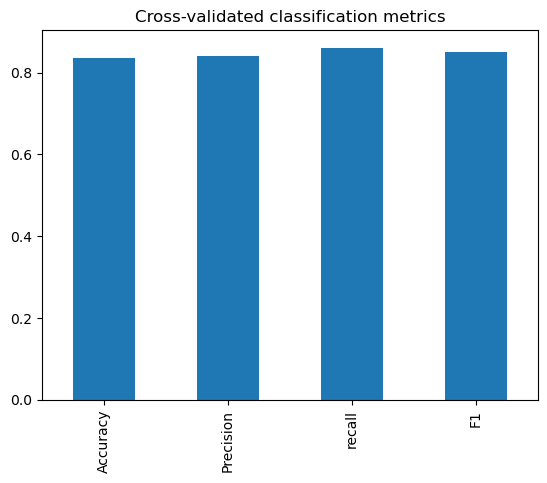

In [378]:
# Visualize cross-validated metrics
cv_metrics_2 = pd.DataFrame(
    {
        "Accuracy": cv_acc_2,
        "Precision": cv_precision_2,
        "recall": cv_recall_2,
        "F1": cv_f1_2
    },
    index=[0]
)

cv_metrics_2.T.plot.bar(title="Cross-validated classification metrics", legend=False);

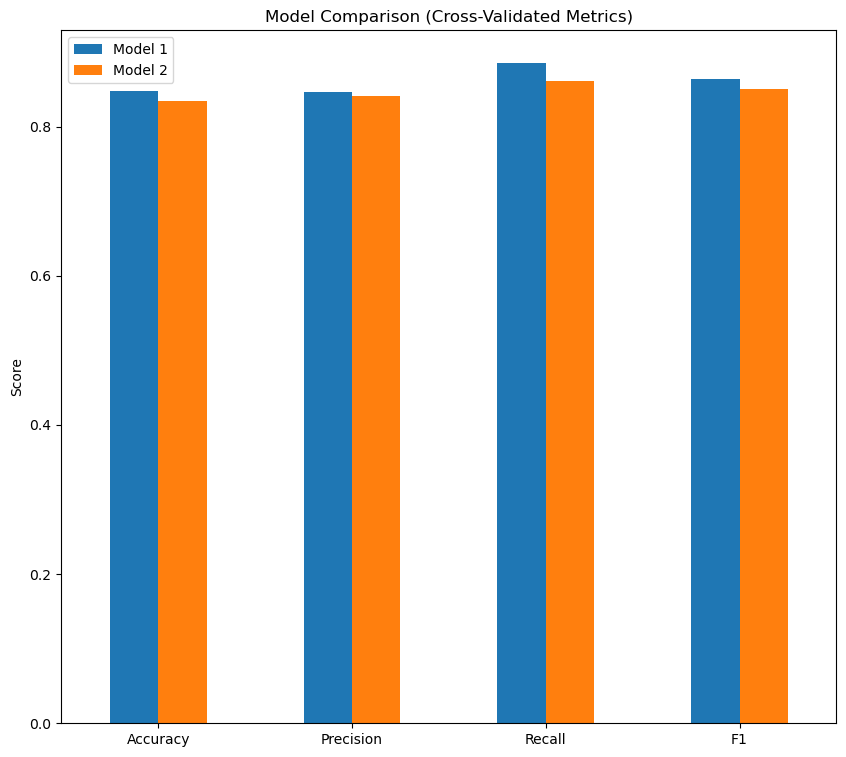

In [379]:
m1 = pd.DataFrame({
    "Accuracy": [cv_acc],
    "Precision": [cv_precision],
    "Recall": [cv_recall],
    "F1": [cv_f1]
}, index=["Model 1"])

m2 = pd.DataFrame({
    "Accuracy": [cv_acc_2],
    "Precision": [cv_precision_2],
    "Recall": [cv_recall_2],
    "F1": [cv_f1_2]
}, index=["Model 2"])

# Concatenate both
combined_df = pd.concat([m1, m2])

# Transpose for bar plot
combined_df.T.plot(kind="bar", figsize=(10, 9), title="Model Comparison (Cross-Validated Metrics)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend();

In [380]:
combined_df

,Accuracy,Precision,Recall,F1
Model 1,0.847978,0.846359,0.884848,0.864182
Model 2,0.834863,0.840989,0.860606,0.850201


**Model 1** is performing better than Model 2

In [381]:
model.score(X_test, y_test)

0.8852459016393442

### Feature importance

Feature importance is another way of asking, which features contributed most to the outcomes of the model and how the contribute?

FInding feature importance is different for each machine learning model.

Let's find feature importance for our LogisticRegression model..

In [382]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [383]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                     transformers=[('num', StandardScaler(),
                                    ['age', 'trestbps', 'chol', 'thalach',
                                     'oldpeak']),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['cp', 'restecg', 'slope', 'thal', 'ca'])])),
  ('model', LogisticRegression(C=0.46415888336127775, solver='liblinear'))],
 'transform_input': None,
 'verbose': False,
 'preprocessor': ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                   transformers=[('num', StandardScaler(),
                                  ['age', 'trestbps', 'chol', 'thalach',
                                   'oldpeak']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['cp', 'restecg',

In [384]:
# check coef_
model["model"].coef_

array([[ 0.09997893, -0.26317666, -0.0757662 ,  0.26255393, -0.56626043,
        -0.87799211, -0.05783201,  0.57391891,  0.56873055, -0.06941086,
         0.2948775 , -0.01864129, -0.05385264, -0.33738558,  0.59806358,
         0.02657393,  0.17134408,  0.63870752, -0.62980018,  1.29478456,
        -0.56954894, -0.67706637, -0.22030591,  0.37896202, -0.88554866,
         0.27463762, -0.69987292]])

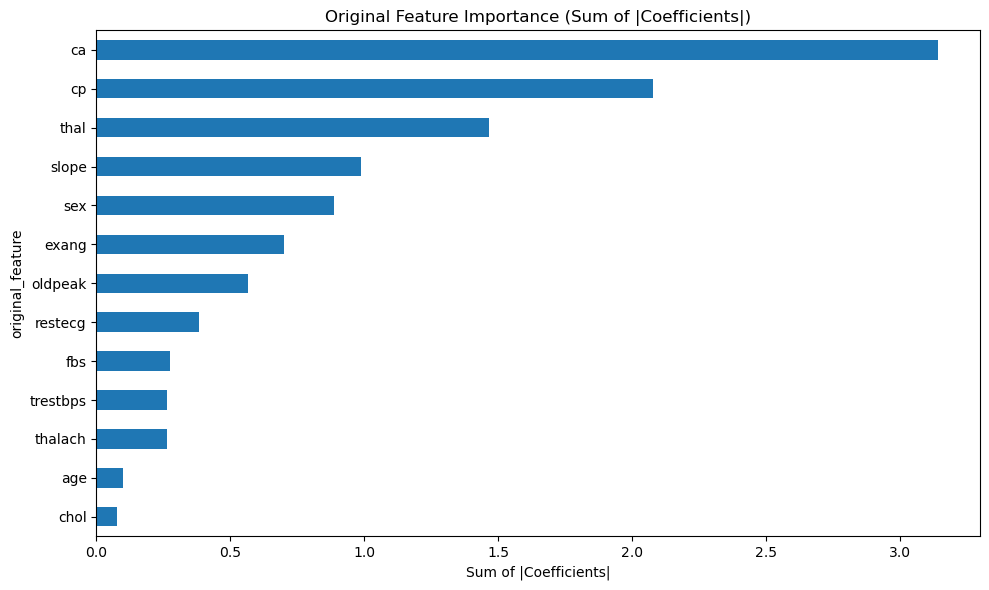

In [385]:
# Step 1: Extract from pipeline
preprocessor = model.named_steps['preprocessor']
clf = model.named_steps['model']

# Step 2: Get transformed feature names robustly
def get_feature_names(preprocessor, cat_features, num_features):
    output_features = []

    for name, transformer, cols in preprocessor.transformers_:
        if transformer == 'drop':
            continue
        elif transformer == 'passthrough':
            output_features.extend(cols)
        elif hasattr(transformer, 'get_feature_names_out'):
            # Add transformer output names (e.g., one-hot encoded)
            output_features.extend(transformer.get_feature_names_out(cols))
        else:
            output_features.extend(cols)  # fallback for scalers etc.
    
    return output_features

all_feature_names = get_feature_names(preprocessor, categorical_features, numeric_features)

# Step 3: Get model coefficients
coefs = clf.coef_[0] 

# Step 4: Create DataFrame
coef_df = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': coefs,
    'abs_coeff': np.abs(coefs)
})

# Step 5: Map one-hot encoded names to original feature
def original_feature(name):
    for cat in categorical_features:
        if name.startswith(cat + '_'):
            return cat
    return name

coef_df['original_feature'] = coef_df['feature'].apply(original_feature)

# Step 6: Aggregate importances
importance_df = coef_df.groupby('original_feature')['abs_coeff'].sum().sort_values(ascending=False)

# Step 7: Visualize
importance_df.plot(kind='barh', figsize=(10, 6))
plt.title("Original Feature Importance (Sum of |Coefficients|)")
plt.xlabel("Sum of |Coefficients|")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Export the best model for now...

In [387]:
import pickle

# save the model
filename = '../data/model.pkl'
pickle.dump(model, open(filename, 'wb')) 

# load the model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'restecg', 'slope',
                                                   'thal', 'ca'])])),
                ('model',
                 LogisticRegression(C=0.46415888336127775,
                                    solver='liblinear'))])

In [391]:
loaded_model.score(X_test, y_test)

0.8852459016393442